In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [8]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('/content/housing.csv', sep='\s+', names=column_names)
df = pd.DataFrame(data)
print(df.head())
print("\n")

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  




<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-2377676059.py:2: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv('/content/housing.csv', sep='\s+', names=column_names)


In [9]:
X = df[['RM']]
y = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
print("\n")

X_train shape: (404, 1)
X_test shape: (102, 1)
y_train shape: (404,)
y_test shape: (102,)




In [10]:
model = LinearRegression()
model.fit(X_train, y_train)
print(f"Model Intercept (b): {model.intercept_}")
print(f"Model Coefficient (m): {model.coef_[0]}")
print("Formula: Score = (Hours * {model.coef_[0]:.2f}) + {model.intercept_:.2f}")

Model Intercept (b): -36.24631889813795
Model Coefficient (m): 9.348301406497727
Formula: Score = (Hours * {model.coef_[0]:.2f}) + {model.intercept_:.2f}




In [16]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 46.14
R-squared (R2): 0.37


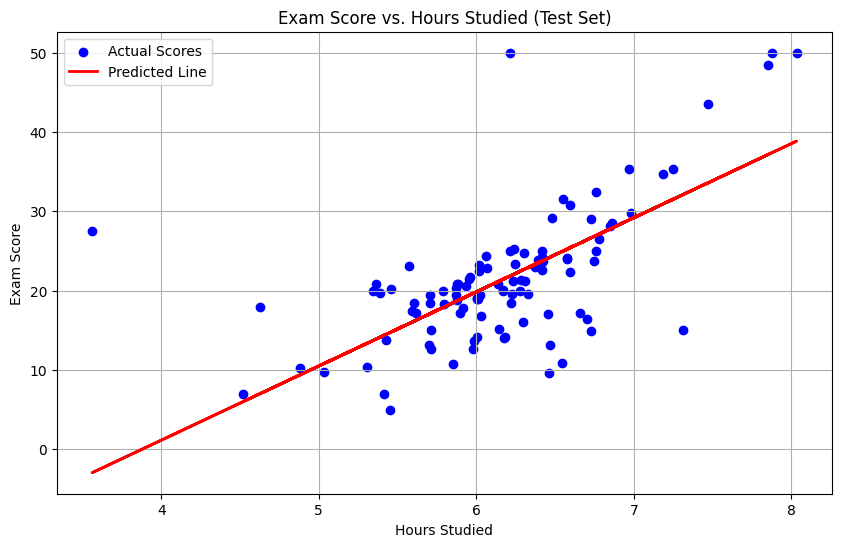

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Scores')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Line')
plt.title('Exam Score vs. Hours Studied (Test Set)')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.legend()
plt.grid(True)
plt.show()
